In [4]:
from google.colab import files
uploaded = files.upload()  # choose weatherAUS.csv

Saving weatherAUS.csv to weatherAUS.csv


In [5]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('weatherAUS.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df = df.drop(['Date','Location'], axis=1)
df = df.dropna()   # quick approach; may reduce data size


In [9]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [10]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8628146047500886
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8799
           1       0.77      0.53      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.83      0.74      0.77     11284
weighted avg       0.86      0.86      0.85     11284



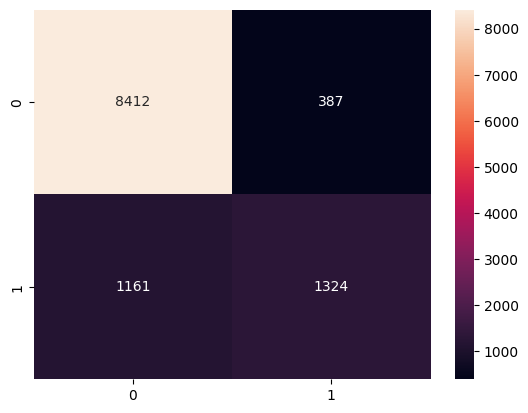

In [13]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[100,200], 'max_depth':[None,10,20]}
gs = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='f1')
gs.fit(X_train, y_train)
print(gs.best_params_)


{'max_depth': 20, 'n_estimators': 200}


In [17]:
import joblib
joblib.dump(model, 'rf_weather.pkl')
joblib.dump(scaler, 'scaler.pkl')
from google.colab import files
files.download('rf_weather.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
def predict_single(row_dict):
    row = pd.DataFrame([row_dict])
    # same preprocessing: encode, scale, reorder columns as X
    row = row.reindex(columns=X.columns, fill_value=0)
    row_scaled = scaler.transform(row)
    return model.predict(row_scaled)[0]  # 0 or 1


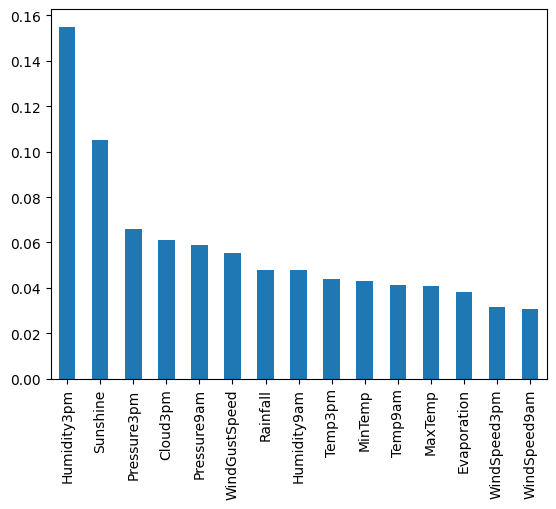

In [19]:
importances = model.feature_importances_
feat = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat.head(15).plot(kind='bar'); plt.show()


In [20]:
print(feat.head(10))


Humidity3pm      0.155078
Sunshine         0.105126
Pressure3pm      0.065811
Cloud3pm         0.061286
Pressure9am      0.058926
WindGustSpeed    0.055150
Rainfall         0.048057
Humidity9am      0.047972
Temp3pm          0.044014
MinTemp          0.042857
dtype: float64


In [21]:
top_features = feat.head(10).index
X_top = X[top_features]

# Train a new model with fewer features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)
model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train_top)

y_pred_top = model_top.predict(X_test_top)
print("Accuracy with top features:", accuracy_score(y_test_top, y_pred_top))


Accuracy with top features: 0.858029067706487


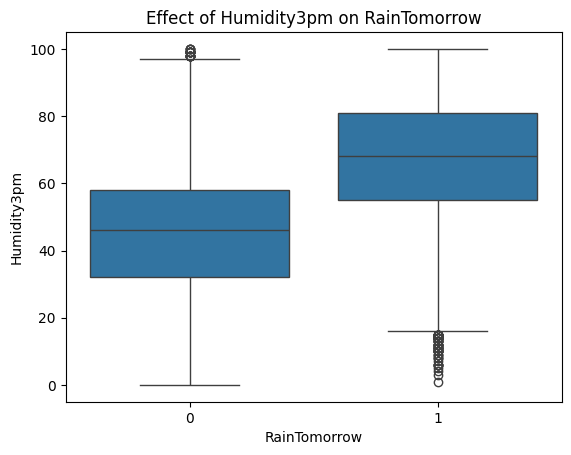

In [22]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Effect of Humidity3pm on RainTomorrow')
plt.show()


In [23]:
import joblib
joblib.dump(model, 'weather_rf_model.pkl')


['weather_rf_model.pkl']

In [25]:
def predict_weather(input_data):
    df_input = pd.DataFrame([input_data])
    df_input = df_input.reindex(columns=X.columns, fill_value=0)
    return model.predict(df_input)[0]


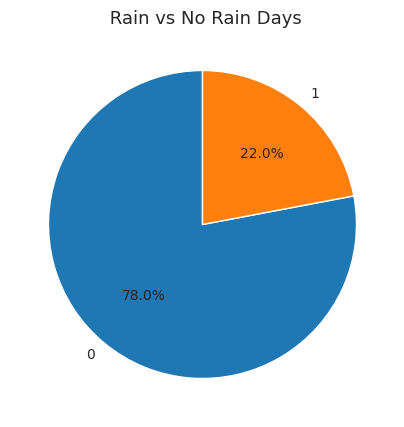

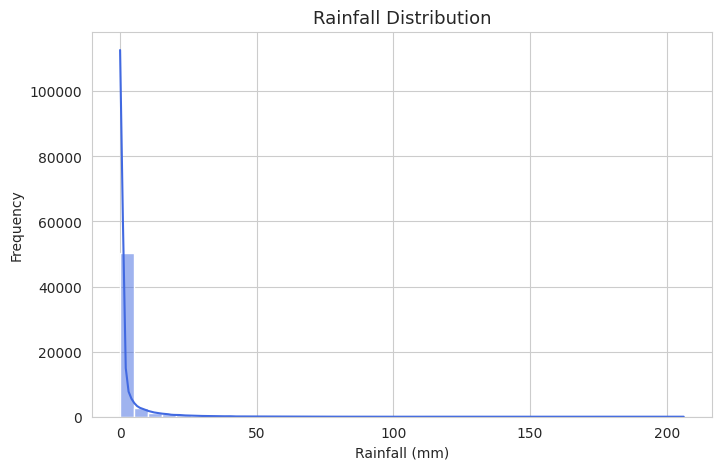

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


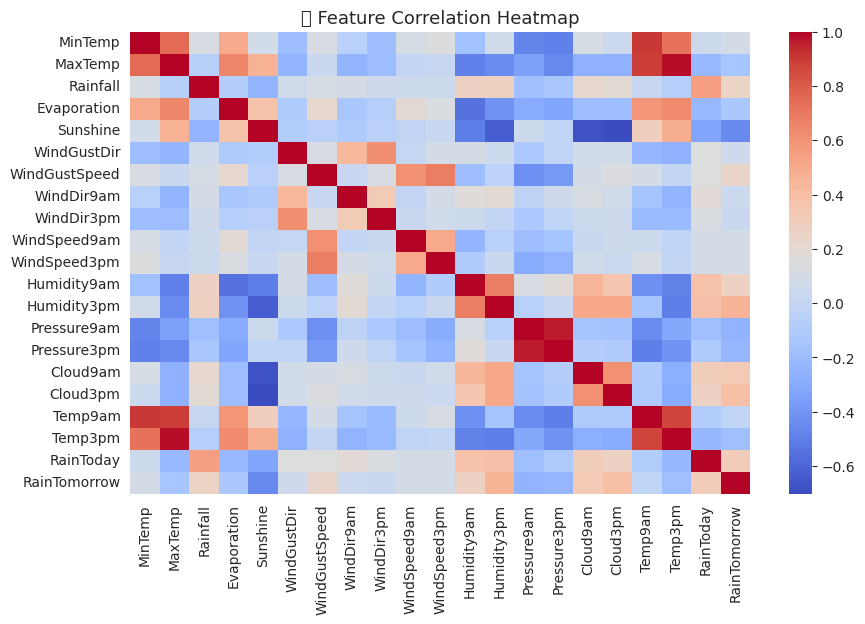

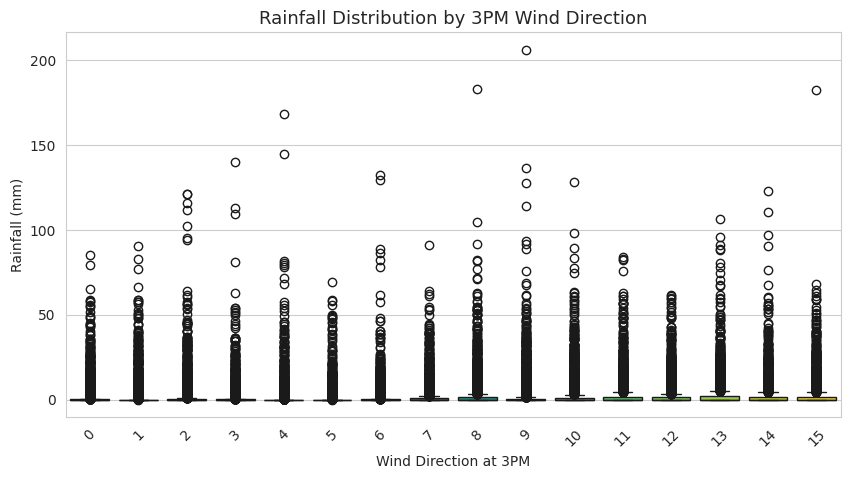

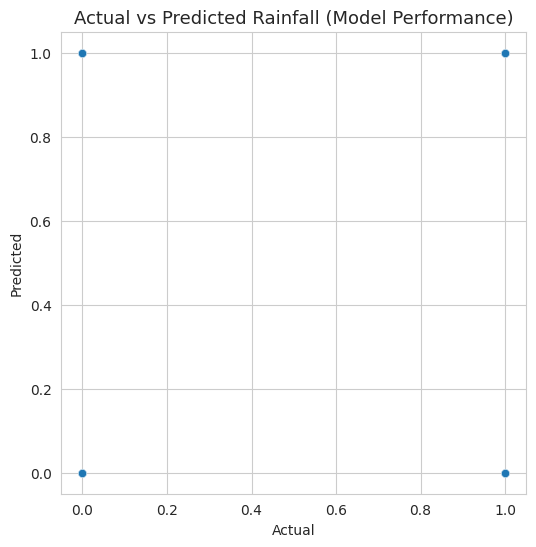

In [35]:
# ==============================================================
# 📊 WEATHER PREDICTION DATA VISUALIZATION (Professional Report)
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

sns.set_style("whitegrid")

# -----------------------------
# 1️⃣ DATE HANDLING
# -----------------------------
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
    df['MonthName'] = df['Date'].dt.month.apply(
        lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else None
    )
else:
    df['MonthName'] = None

# -----------------------------
# 2️⃣ CLEANING
# -----------------------------
df['Rainfall'] = df['Rainfall'].fillna(0)

# -----------------------------
# 3️⃣ TOTAL & AVERAGE RAINFALL
# -----------------------------
if 'MonthName' in df.columns and df['MonthName'].notnull().any():
    monthly_rain = (
        df.groupby('MonthName')['Rainfall']
        .sum()
        .reindex([calendar.month_abbr[i] for i in range(1,13)])
    )

    monthly_avg = (
        df.groupby('MonthName')['Rainfall']
        .mean()
        .reindex([calendar.month_abbr[i] for i in range(1,13)])
    )

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.barplot(x=monthly_rain.index, y=monthly_rain.values, palette='Blues_d', ax=axes[0])
    axes[0].set_title(' Total Rainfall by Month', fontsize=13)
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Total Rainfall (mm)')

    sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm', ax=axes[1])
    axes[1].set_title(' Average Rainfall by Month', fontsize=13)
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Avg Rainfall (mm)')

    plt.tight_layout()
    plt.show()

# -----------------------------
# 4️⃣ PIE CHART – RAIN VS NO RAIN
# -----------------------------
if 'RainTomorrow' in df.columns:
    rain_counts = df['RainTomorrow'].value_counts()
else:
    rain_counts = pd.Series({
        'No': (df['Rainfall'] == 0).sum(),
        'Yes': (df['Rainfall'] > 0).sum()
    })

plt.figure(figsize=(5,5))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(' Rain vs No Rain Days', fontsize=13)
plt.show()

# -----------------------------
# 5️⃣ RAINFALL DISTRIBUTION (clean, warning-free)
plt.figure(figsize=(8,5))
sns.histplot(df['Rainfall'], bins=40, kde=True, color='royalblue')
plt.title('Rainfall Distribution', fontsize=13)   # removed 📈 emoji
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


# -----------------------------
# 6️⃣ CORRELATION HEATMAP
# -----------------------------
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
    plt.title('🔗 Feature Correlation Heatmap', fontsize=13)
    plt.show()

# -----------------------------
# 7️⃣ RAINFALL VS WIND DIRECTION (BOXPLOT) — cleaned version
if 'WindDir3pm' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='WindDir3pm', y='Rainfall', data=df, hue='WindDir3pm', palette='viridis', legend=False)
    plt.title('Rainfall Distribution by 3PM Wind Direction', fontsize=13)
    plt.xlabel('Wind Direction at 3PM')
    plt.ylabel('Rainfall (mm)')
    plt.xticks(rotation=45)
    plt.show()


# -----------------------------
# 8️⃣ ACTUAL VS PREDICTED RAINFALL (if predictions available)
# -----------------------------
if 'y_test' in locals() and 'y_pred' in locals():
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Rainfall (Model Performance)', fontsize=13)
    plt.show()

